<a href="https://colab.research.google.com/github/Zakaal/PCVK_Ganjil_24_25/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA : MOCHAMMAD ZAKARO AL FAJRI**

**KELAS : TI - 3F**

**NIM : 2241720175**

**NO. ABSEN : 14**

---

# **MODUL 6 – Histogram, Histogram Equalization, Dithering**

In [25]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Buatlah histogram citra menggunakan gambar lenna**

In [26]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math
import os
import glob

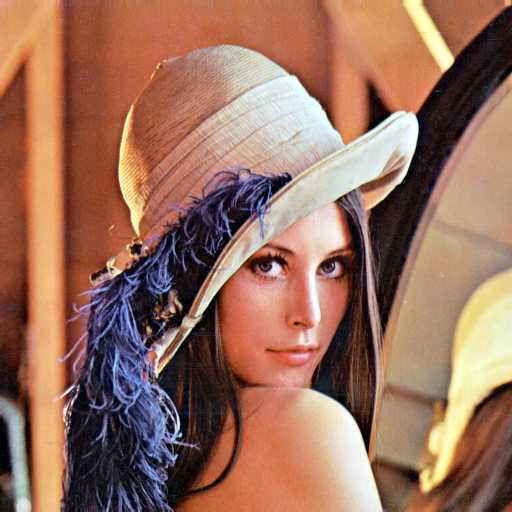

In [27]:
img = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
cv2_imshow(img)

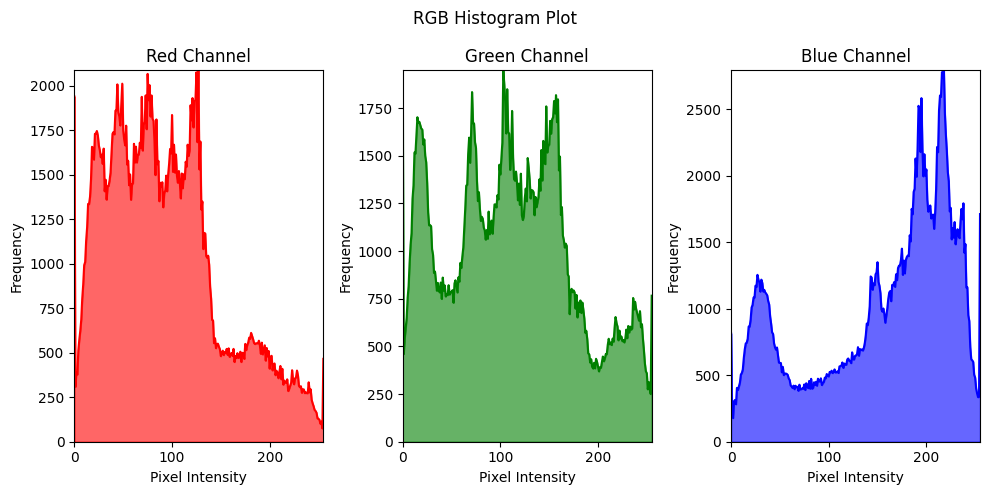

In [28]:
channels = cv.split(img)
colors = ('r', 'g', 'b')
channel_names = ['Red', 'Green', 'Blue']

channels = cv.split(img)
colors = ('r', 'g', 'b')
channel_names = ['Red', 'Green', 'Blue']

plt.figure(figsize=(10, 5))
for i, (channel, color) in enumerate(zip(channels, colors)):
    histogram = [0] * 256

    for row in channel:
        for pixel in row:
            histogram[pixel] += 1

    plt.subplot(1, 3, i + 1)
    plt.plot(histogram, color=color)
    plt.fill_between(range(256), histogram, color=color, alpha=0.6)
    plt.title(f'{channel_names[i]} Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])

    plt.ylim([0, max(histogram)])

plt.suptitle('RGB Histogram Plot')
plt.tight_layout()
plt.show()

# **2. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”.Bandingkan hasilnya. Apakah output muncul sama?**

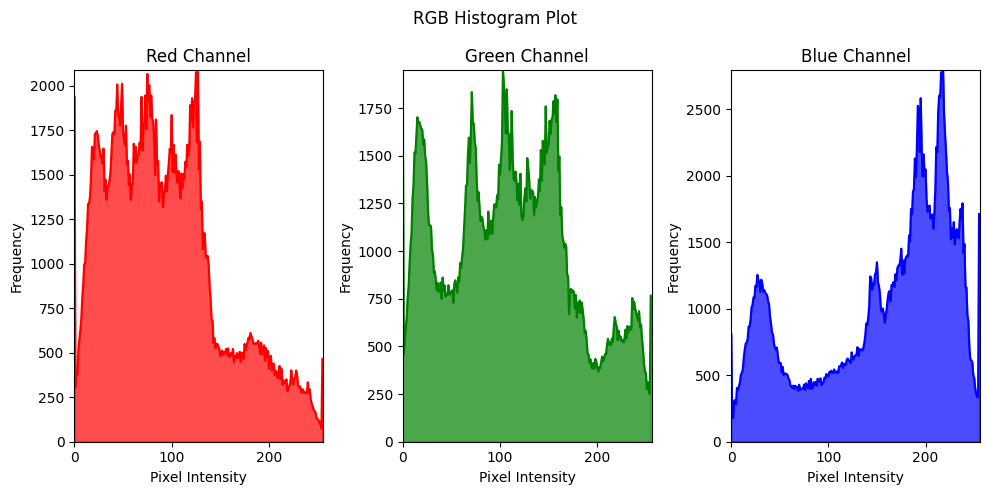

In [29]:
plt.figure(figsize=(10, 5))
for i, (channel, color) in enumerate(zip(channels, colors)):
    histogram, bin_edges = np.histogram(channel, bins=256, range=(0, 256))

    plt.subplot(1, 3, i + 1)
    plt.plot(bin_edges[0:-1], histogram, color=color)
    plt.fill_between(bin_edges[0:-1], histogram, color=color, alpha=0.7)
    plt.title(f'{channel_names[i]} Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])

    plt.ylim([0, max(histogram)])

plt.suptitle('RGB Histogram Plot')
plt.tight_layout()
plt.show()

**Jawab : Ouput yang dihasilkan sama dan tidak ada perubahaan yang signifikan**

# **3. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization**

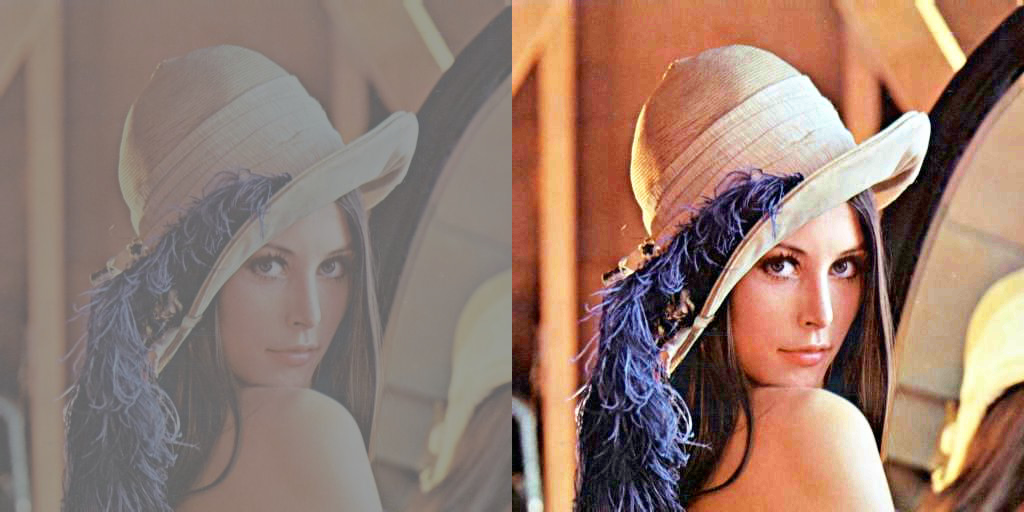

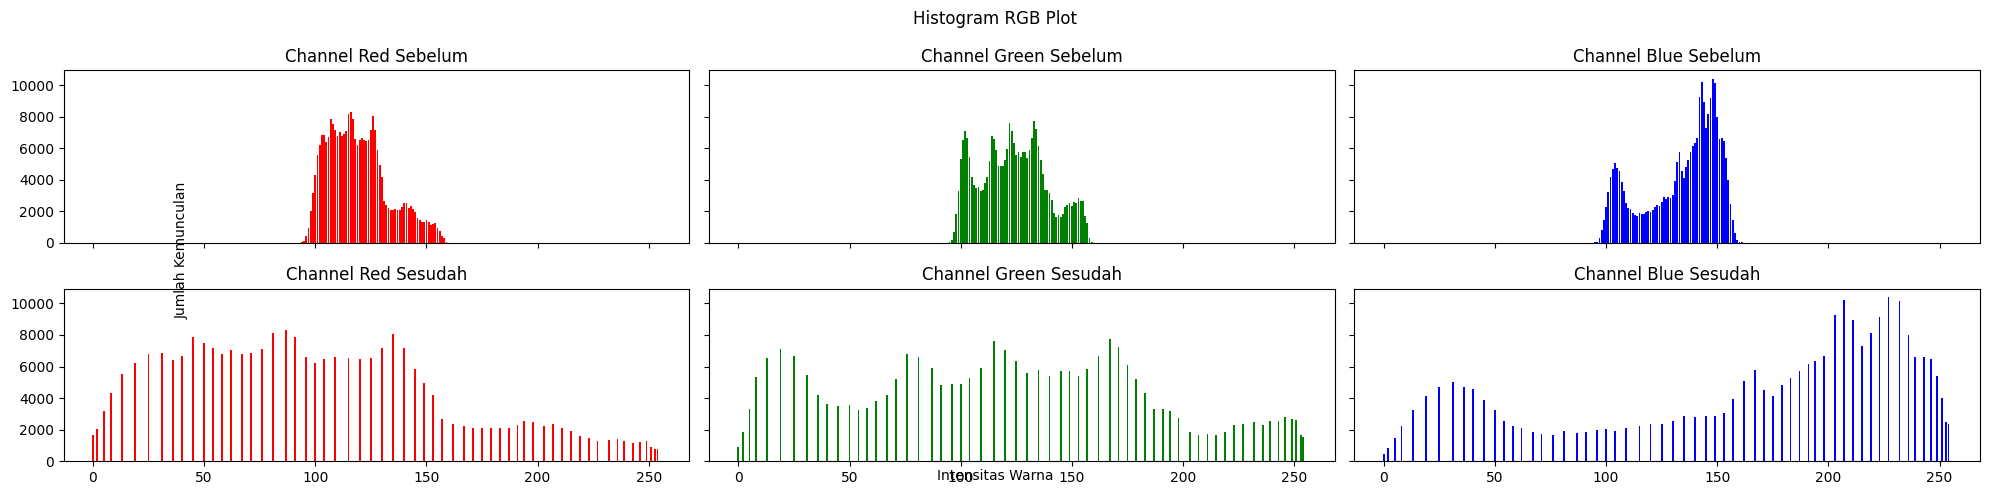

In [30]:
image = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

def calculate_histogram(image):
    histogram = np.zeros((3, 256))
    for channel in range(3):  # Untuk setiap channel (B, G, R)
        histogram[channel] = cv.calcHist([image], [channel], None, [256], [0, 256]).flatten()
    return histogram

histo_asli = calculate_histogram(image)

img_array = image.flatten()
histogram_array, _ = np.histogram(img_array, bins=256, range=(0, 256))
num_pixels = img_array.size
normalized_histogram = histogram_array / num_pixels
cumulative_histogram = np.cumsum(normalized_histogram)
transform_map = np.floor(255 * cumulative_histogram).astype(np.uint8)

# Transformasi pixel values
equalized_img = transform_map[img_array]
image_eq = equalized_img.reshape(image.shape)

# Histogram citra setelah equalization
equal_histo = calculate_histogram(image_eq)

# Menampilkan gambar asli dan hasil histogram equalization
final_frame = cv.hconcat([image, image_eq])
cv2_imshow(final_frame)

# Menampilkan histogram sebelum dan sesudah equalization
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

colors = ['red', 'green', 'blue']
for i in range(3):
    axs[0, i].bar(np.arange(256), histo_asli[i], color=colors[i])
    axs[0, i].set_title(f'Channel {colors[i].capitalize()} Sebelum')
    axs[1, i].bar(np.arange(256), equal_histo[i], color=colors[i])
    axs[1, i].set_title(f'Channel {colors[i].capitalize()} Sesudah')

plt.tight_layout()
plt.show()

# **4. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya**

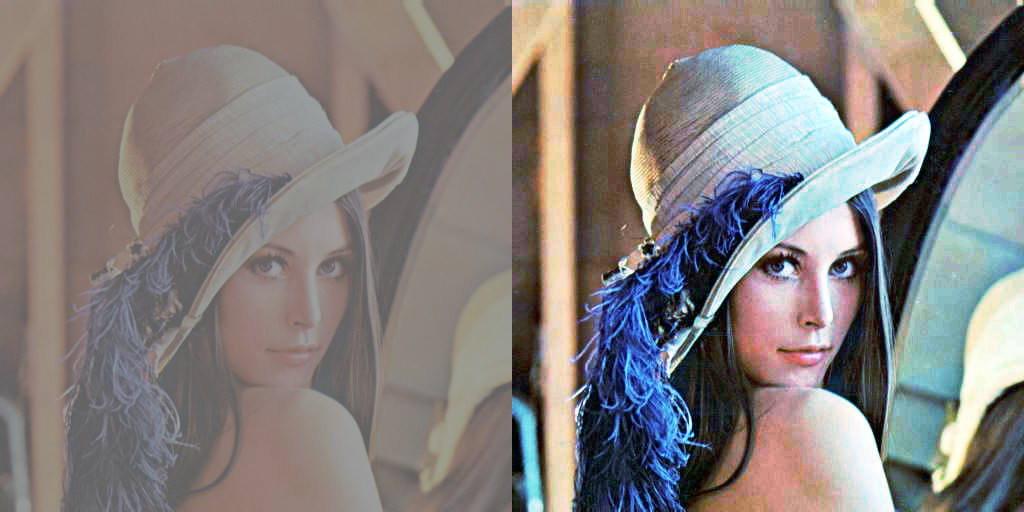

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img1 = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

channels = cv.split(img1)
equalized_channels = [cv.equalizeHist(channel) for channel in channels]
img2 = cv.merge(equalized_channels)

# Menampilkan gambar asli dan setelah histogram equalization
final_frame = cv.hconcat([img1, img2])
cv2_imshow(final_frame)


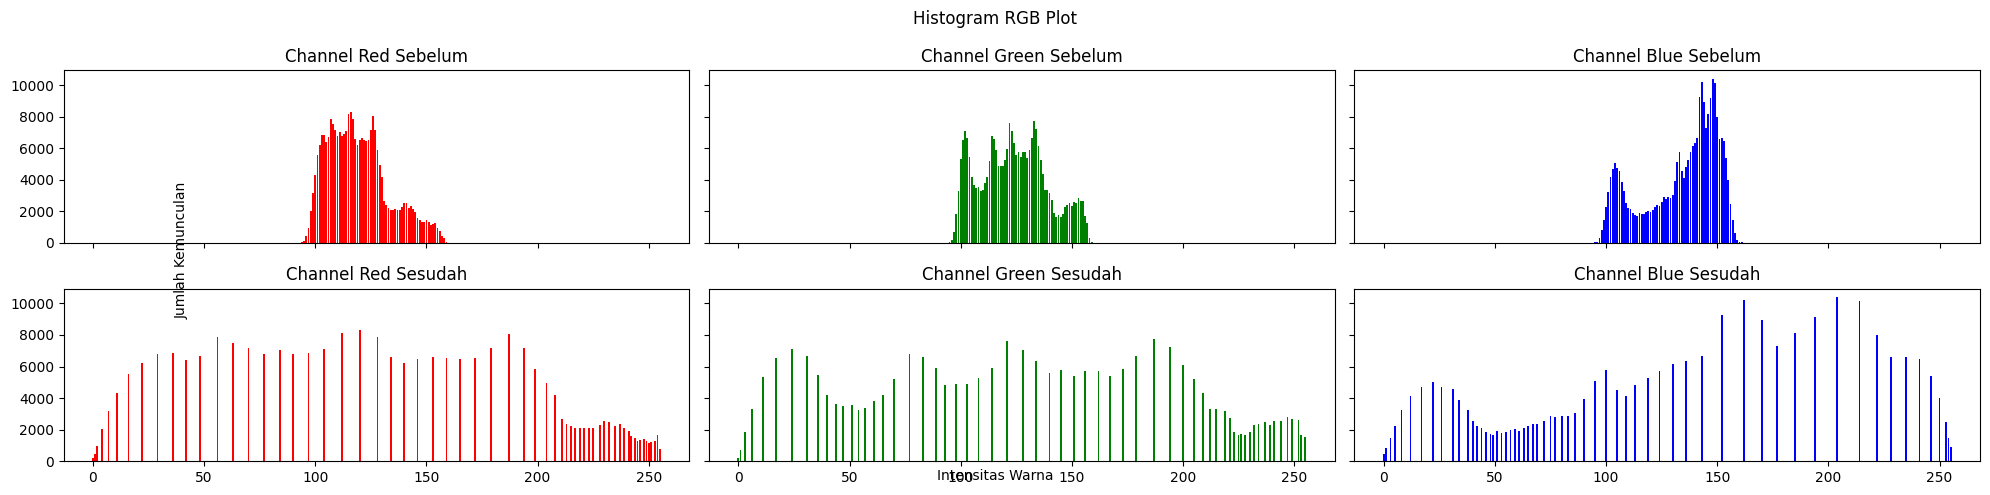

In [32]:
# Fungsi untuk menghitung histogram
def calculate_histogram(image):
    histogram = np.zeros((3, 256))
    for i in range(3):
        histogram[i] = cv.calcHist([image], [i], None, [256], [0, 256]).flatten()
    return histogram

# Menghitung histogram sebelum dan sesudah equalization
histo_asli = calculate_histogram(img1)
histo_equalized = calculate_histogram(img2)

# Menampilkan histogram sebelum dan sesudah equalization
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

colors = ['red', 'green', 'blue']
for i in range(3):
    axs[0, i].bar(np.arange(256), histo_asli[i], color=colors[i])
    axs[0, i].set_title(f'Channel {colors[i].capitalize()} Sebelum')
    axs[1, i].bar(np.arange(256), histo_equalized[i], color=colors[i])
    axs[1, i].set_title(f'Channel {colors[i].capitalize()} Sesudah')

plt.tight_layout()
plt.show()

**Jawab : Output pada langkah 5 dengan langkah yang menggunakan “equalizeHist”, terdapat sedikit perbedaan. Perbedaan Secara keseluruhan yaitu terdapat perbaikan dengan equalizeHist di gambar kedua memperjelas fitur visual, terutama pada bulu topi dan wajah.**

# **5. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart**

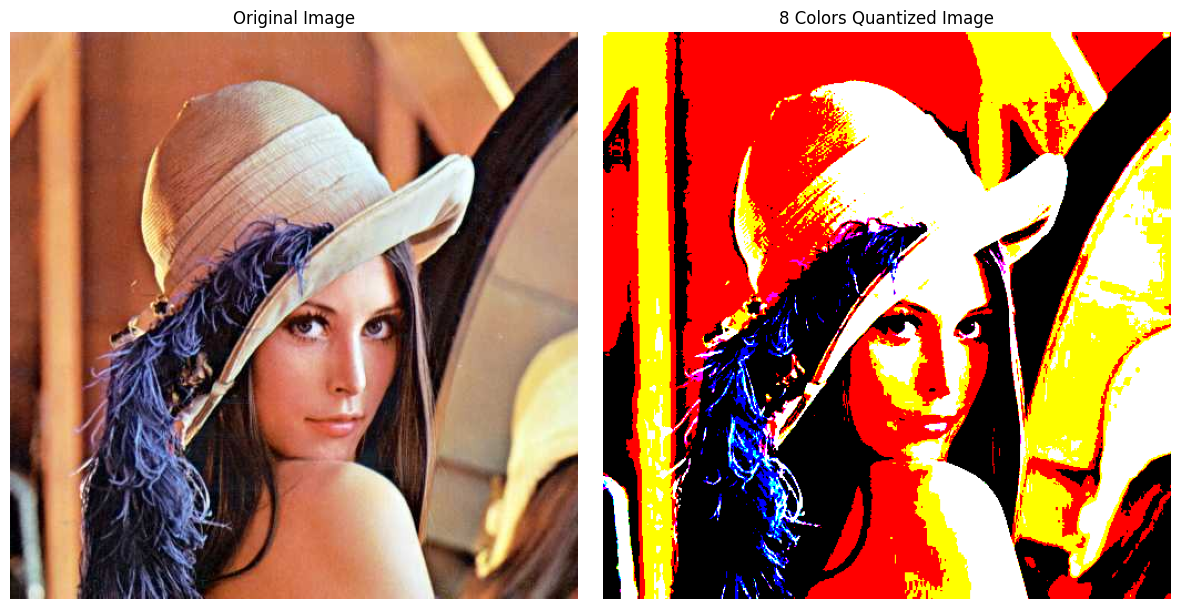

In [33]:
img = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

def map_color(r, g, b):
    threshold = 128
    r_bit = 1 if r > threshold else 0
    g_bit = 1 if g > threshold else 0
    b_bit = 1 if b > threshold else 0
    color_index = (r_bit << 2) | (g_bit << 1) | b_bit
    color_map = {
        0: (0, 0, 0),      # Black
        1: (0, 0, 255),    # Blue
        2: (0, 255, 0),    # Green
        3: (0, 255, 255),  # Cyan
        4: (255, 0, 0),    # Red
        5: (255, 0, 255),  # Magenta
        6: (255, 255, 0),  # Yellow
        7: (255, 255, 255) # White
    }
    return color_map[color_index]

def quantize_image(img):
    img_array = np.array(img)
    output_array = np.zeros_like(img_array)
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            r, g, b = img_array[i, j]
            output_array[i, j] = map_color(r, g, b)
    return Image.fromarray(output_array.astype('uint8'), 'RGB')


quantized_image = quantize_image(img)

# Plotting
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Quantized image (8 colors)
plt.subplot(1, 2, 2)
plt.imshow(quantized_image)
plt.title('8 Colors Quantized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# **6. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering)**

In [34]:
# Fungsi untuk membatasi nilai pixel dalam rentang [0, 255]
def threshold(nilai):
    if nilai > 255:
        return 255
    elif nilai < 0:
        return 0
    return nilai

# Membaca gambar input
img = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
height, width = img.shape[:2]

# Membuat salinan gambar untuk hasil dithering
dithered_img = img.copy()

In [35]:
# Proses Floyd-Steinberg Dithering
for y in range(height - 1):
    for x in range(1, width - 1):
        # Mendapatkan nilai pixel RGB asli
        old_pixel_blue = dithered_img[y, x, 0]
        old_pixel_green = dithered_img[y, x, 1]
        old_pixel_red = dithered_img[y, x, 2]

        # Menentukan nilai baru pixel
        new_pixel_blue = np.round(old_pixel_blue / 255.0) * 255
        new_pixel_green = np.round(old_pixel_green / 255.0) * 255
        new_pixel_red = np.round(old_pixel_red / 255.0) * 255

        # Memperbarui pixel pada gambar
        dithered_img[y, x, 0] = new_pixel_blue
        dithered_img[y, x, 1] = new_pixel_green
        dithered_img[y, x, 2] = new_pixel_red

        # Menghitung kesalahan (error) untuk setiap channel
        error_blue = old_pixel_blue - new_pixel_blue
        error_green = old_pixel_green - new_pixel_green
        error_red = old_pixel_red - new_pixel_red

        # Menyebarkan kesalahan ke piksel tetangga berdasarkan Floyd-Steinberg weights
        if x + 1 < width:
            dithered_img[y, x + 1, 0] = threshold(dithered_img[y, x + 1, 0] + error_blue * 7 / 16)
            dithered_img[y, x + 1, 1] = threshold(dithered_img[y, x + 1, 1] + error_green * 7 / 16)
            dithered_img[y, x + 1, 2] = threshold(dithered_img[y, x + 1, 2] + error_red * 7 / 16)

        if y + 1 < height:
            if x > 0:
                dithered_img[y + 1, x - 1, 0] = threshold(dithered_img[y + 1, x - 1, 0] + error_blue * 3 / 16)
                dithered_img[y + 1, x - 1, 1] = threshold(dithered_img[y + 1, x - 1, 1] + error_green * 3 / 16)
                dithered_img[y + 1, x - 1, 2] = threshold(dithered_img[y + 1, x - 1, 2] + error_red * 3 / 16)

            dithered_img[y + 1, x, 0] = threshold(dithered_img[y + 1, x, 0] + error_blue * 5 / 16)
            dithered_img[y + 1, x, 1] = threshold(dithered_img[y + 1, x, 1] + error_green * 5 / 16)
            dithered_img[y + 1, x, 2] = threshold(dithered_img[y + 1, x, 2] + error_red * 5 / 16)

            if x + 1 < width:
                dithered_img[y + 1, x + 1, 0] = threshold(dithered_img[y + 1, x + 1, 0] + error_blue * 1 / 16)
                dithered_img[y + 1, x + 1, 1] = threshold(dithered_img[y + 1, x + 1, 1] + error_green * 1 / 16)
                dithered_img[y + 1, x + 1, 2] = threshold(dithered_img[y + 1, x + 1, 2] + error_red * 1 / 16)

# Menampilkan hasil dithering
final_frame = cv.hconcat((img, dithered_img))
cv2_imshow(final_frame)

# **7. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg**

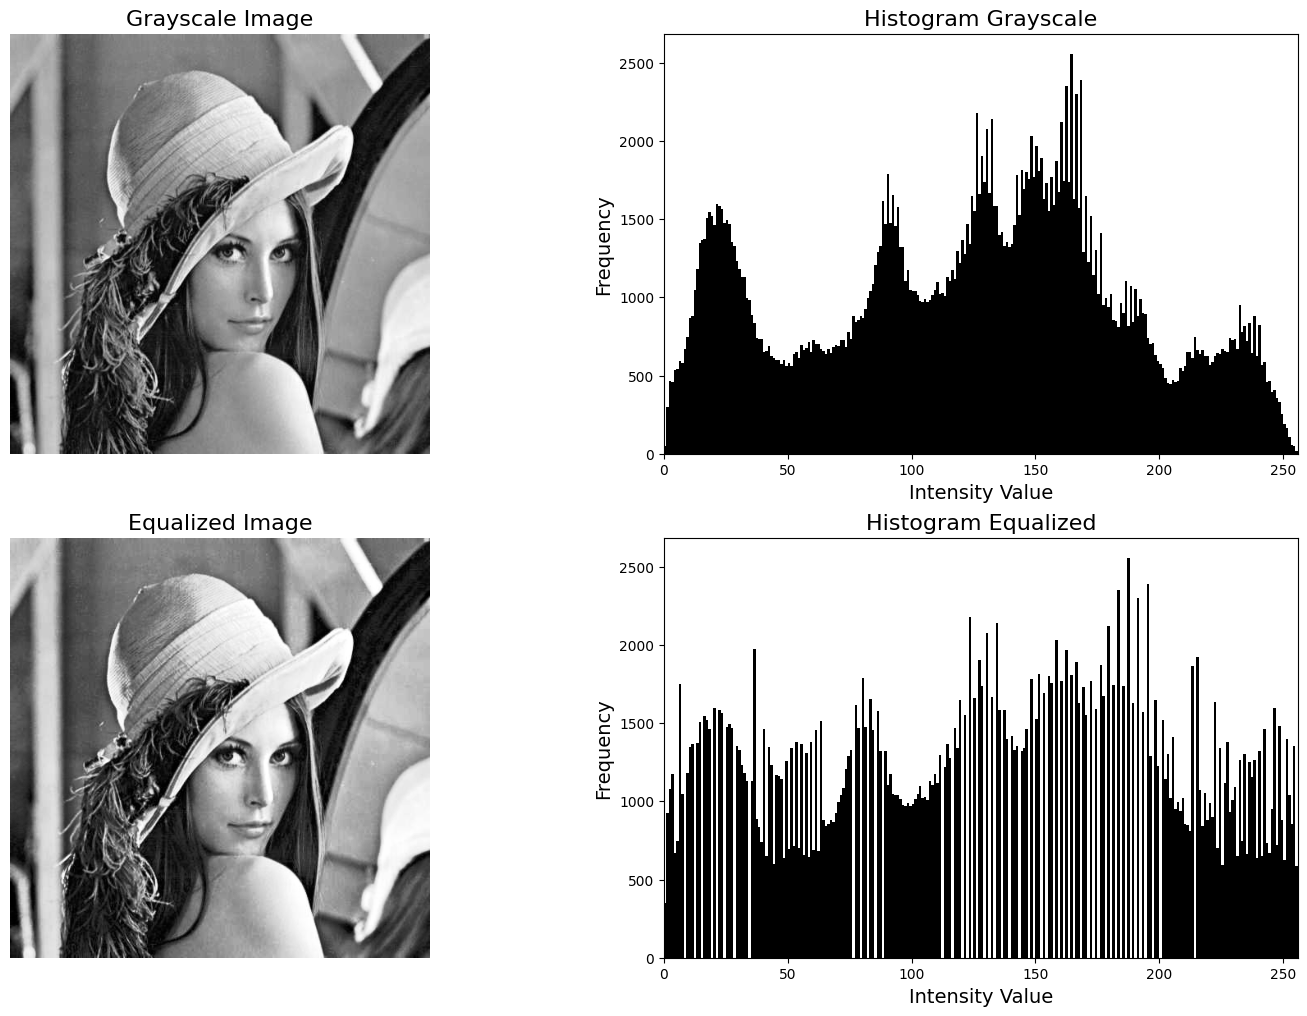

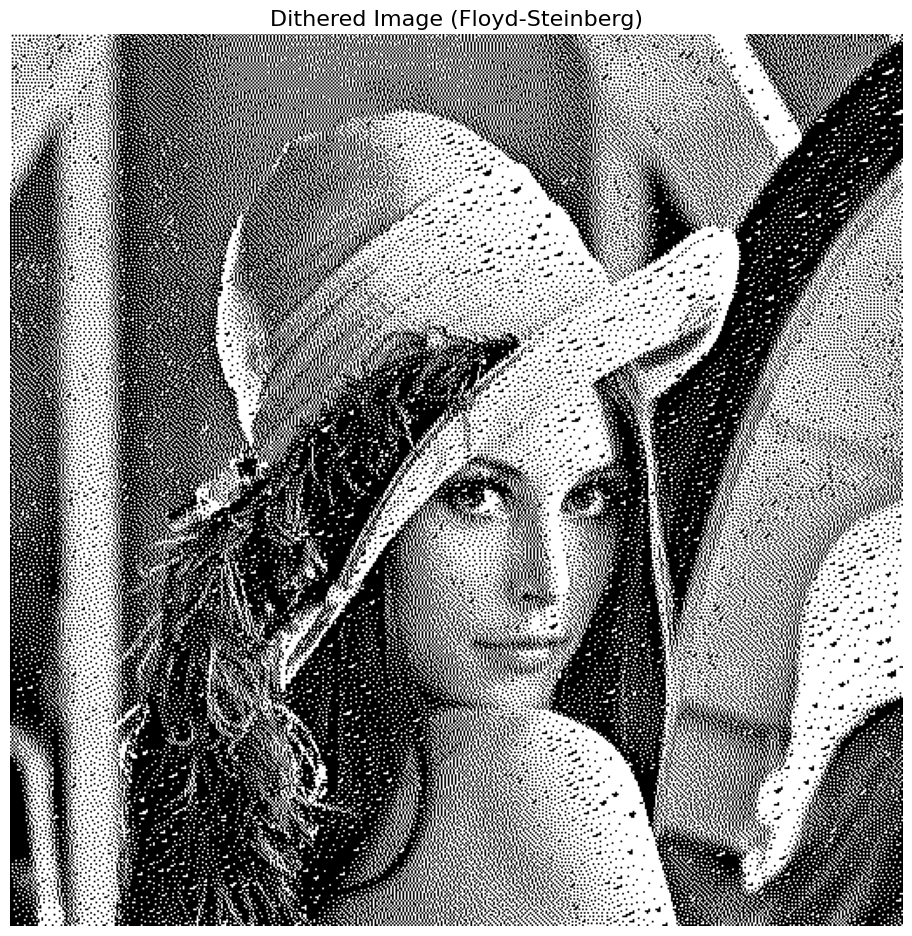

In [36]:
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

equalized_image = cv.equalizeHist(gray_image)

def floyd_steinberg_dithering(image):
    h, w = image.shape
    dithered_image = np.zeros((h, w), dtype=np.uint8)

    for y in range(h):
        for x in range(w):
            old_pixel = image[y, x]
            new_pixel = 255 * (old_pixel // 128)  # Thresholding
            dithered_image[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < w:
                image[y, x + 1] += quant_error * 7 / 16
            if x - 1 >= 0 and y + 1 < h:
                image[y + 1, x - 1] += quant_error * 3 / 16
            if y + 1 < h:
                image[y + 1, x] += quant_error * 5 / 16
            if x + 1 < w and y + 1 < h:
                image[y + 1, x + 1] += quant_error * 1 / 16

    return dithered_image

# Menerapkan dithering Floyd-Steinberg
dithered_image = floyd_steinberg_dithering(equalized_image.copy())

# Menampilkan hasil dengan layout yang rapi
plt.figure(figsize=(18, 12))

# Gambar Grayscale dan Histogram
plt.subplot(2, 2, 1)
plt.title("Grayscale Image", fontsize=16)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Histogram Grayscale", fontsize=16)
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='black')
plt.xlim([0, 256])
plt.xlabel("Intensity Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Gambar Equalized dan Histogram
plt.subplot(2, 2, 3)
plt.title("Equalized Image", fontsize=16)
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Histogram Equalized", fontsize=16)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='black')
plt.xlim([0, 256])
plt.xlabel("Intensity Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Gambar Dithered
plt.figure(figsize=(10, 10))
plt.title("Dithered Image (Floyd-Steinberg)", fontsize=16)
plt.imshow(dithered_image, cmap='gray')
plt.axis('off')

plt.tight_layout(pad=3.0)  # Mengatur tata letak agar tidak tumpang tindih
plt.show()